In [1]:
#Required Libraries
import numpy as np  
import pandas as pd

In [2]:
#Read dataset

data = pd.read_csv('/kaggle/input/predictcarprice/cars.csv')

In [3]:
data.head()

,enginesize,carlength,carwidth,carheight,price
0,130,168.8,64.1,48.8,13495
1,130,168.8,64.1,48.8,16500
2,152,171.2,65.5,52.4,16500
3,109,176.6,66.2,54.3,13950
4,136,176.6,66.4,54.3,17450


In [4]:
data.shape

(99, 5)

In [5]:
#Grab features and label from dataframe
x = data[['enginesize', 'carheight']].values
y = data['price'].values

print(x.shape)
print(y.shape)

(99, 2)
(99,)


Normal Equation
    <p>
    
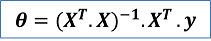

In [6]:
#Bulding a class for Linear Regression Using Gradient Descent.

class LinearRegression:
    
    def __init__(self, l_rate=0.001, iterations=1000):  #assign values for hyper-parameters
        self.l_rate = l_rate  #learning rate
        self.iterations = iterations  #number of iterations

    def fitGD(self, x, y):  #Fit the training data using Gradient Descent
        self.cost = []  # An empty list to store the error in each iteration
        self.theta = np.zeros((1 + x.shape[1]))  #intitalization,,,Array of zeros , shape= columns + 1  (3,1)
        n = x.shape[0]  #number of training examples 99
        
        for i in range(self.iterations):
            y_pred = self.theta[0] + np.dot(x, self.theta[1:])  # hypothesis h(x).. x=(99,2), theta[1:]=(2,1)
            mse = (1/n) * np.sum((y_pred - y)**2)  #compute the cost function J(theta) using mse
            self.cost.append(mse)  #tracking 
            
            #Derivatives
            d_theta1 = (2/n) * np.dot(x.T, (y_pred - y)) # x.T=(2,99)... (y_pred - y)=(99,1)
            d_theta0 = (2/n) * np.sum(y_pred - y)
            
            #Values update
            self.theta[1:] = self.theta[1:] - self.l_rate * d_theta1
            self.theta[0] = self.theta[0] - self.l_rate * d_theta0                       
        return self
    
    
    def predictGD(self, x):  #Predicts the value after the model has been trained/Gradient Descent.
        return self.theta[0] + np.dot(x, self.theta[1:])
    
    
    def fitNQ(self,x, y):  #Fit the training data using Normal Equation
        z = np.ones((x.shape[0],1))  #Array of ones , shape= rows, one cloumn (99,1)
        x = np.append(z, x, axis=1)  #Array, its 1st cloumn contains ones, other columns contains features x (99,3)
        self.thetas = np.linalg.pinv(x.T.dot(x)).dot(x.T).dot(y) # normal equation,, use pinv() in case of non invertible matrix
  
        return self   

    def predictNQ(self, x):  #Predicts the value after the model has been trained/Normal Equation.
        z = np.ones((x.shape[0],1))  #Array of ones , shape= rows, one cloumn (99,1)
        x = np.append(z, x, axis=1)  #Array, its 1st cloumn contains ones, other columns contains features x (99,3)
        return np.dot(x, self.thetas)  #Linear equation

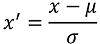

In [7]:
#features scaling using z-score
def scale(x):
    x_scaled = x - np.mean(x, axis=0)
    x_scaled = x_scaled / np.std(x_scaled, axis=0)
    return x_scaled

In [8]:
x_sd= scale(x)  #call the function scale()

lr = LinearRegression()  # creating object lr using the class LinearRegression()
lr.fitGD(x_sd, y)  #call the method fitGD()
lr.fitNQ(x, y)  #call the method fitNQ()

In [9]:
# print theta 0, 1, 2
print("theta_0= ", lr.theta[0])
print("theta_1= ", lr.theta[1])
print("theta_2= ", lr.theta[2])

theta_0=  12007.838077818737
theta_1=  7378.449674762259
theta_2=  1208.9169319699492


In [10]:
# print theta 0, 1, 2
print("theta_0= ", lr.thetas[0])
print("theta_1= ", lr.thetas[1])
print("theta_2= ", lr.thetas[2])

theta_0=  -25593.79925778849
theta_1=  165.83734503864633
theta_2=  346.6014627985526


In [11]:
y_pred = lr.predictGD(x_sd) #predict training examples using Gradient Descent.
y_predNQ = lr.predictNQ(x)  #predict training examples using Normal Equation.

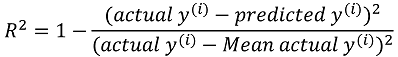

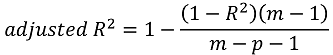

In [12]:
#Evaluate Training GDModel using adjusted R squared
errors = np.sum((y_pred - y)**2)
sst = np.sum((y - np.mean(y))**2)
r2_GD = 1 - (errors/sst)

adusted_r2_GD= 1-((1-r2_GD) * (x.shape[0] -1)/(x.shape[0] - x.shape[1] - 1))
print (adusted_r2_GD)

0.7833948201180297


In [13]:
#Evaluate Training NQModel using adjusted R squared
errors = np.sum((y_predNQ - y)**2)
sst = np.sum((y - np.mean(y))**2)
r2_NQ = 1 - (errors/sst)

adusted_r2_NQ= 1-((1-r2_NQ) * (x.shape[0] -1)/(x.shape[0] - x.shape[1] - 1))
print (adusted_r2_NQ)

0.838274550825138
